## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv('Mall_Customers.csv')
customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print(customer_set.columns, "\n")

print("Розмірність датасету:", customer_set.shape, "\n")

print("Основна статистична інформація:")
print(customer_set.describe(), "\n")

print("Кількість пропущених значень для кожної колонки:")
print(customer_set.isna().sum(), "\n")


Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object') 

Розмірність датасету: (200, 5) 

Основна статистична інформація:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000 

Кількість пропущених значень для кожної колонки:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64 



## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
customer_set.drop(columns=['CustomerID'], inplace=True)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

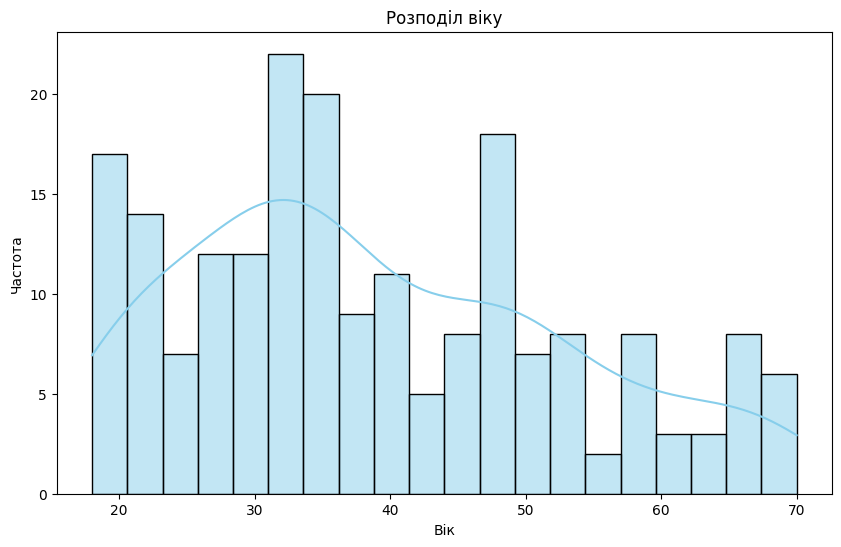

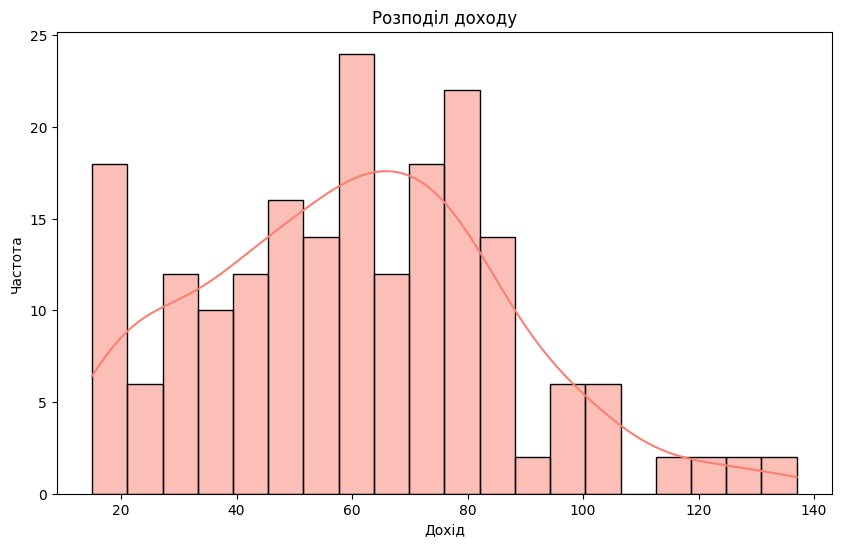

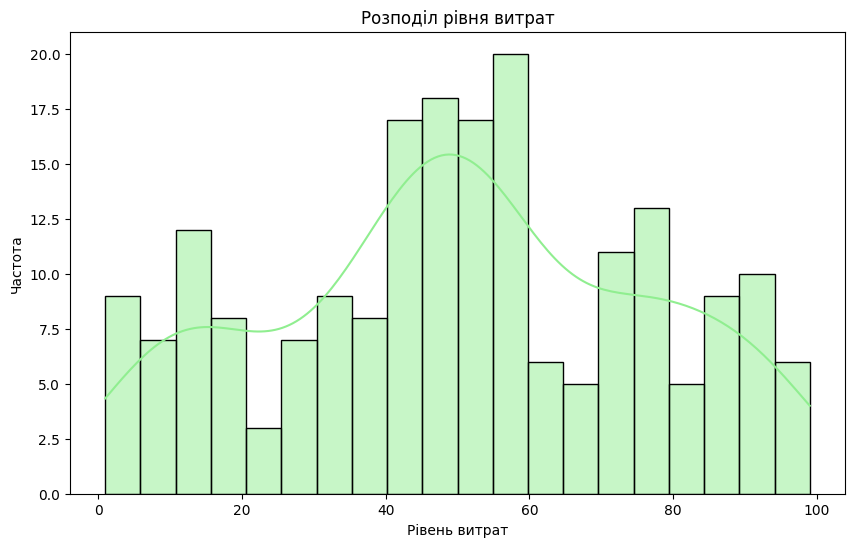

In [5]:
# Діаграма розподілу для змінної Age
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', kde=True, bins=20, color='skyblue')
plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

# Діаграма розподілу для змінної Income
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', kde=True, bins=20, color='salmon')
plt.title('Розподіл доходу')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

# Діаграма розподілу для змінної SpendingScore
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', kde=True, bins=20, color='lightgreen')
plt.title('Розподіл рівня витрат')
plt.xlabel('Рівень витрат')
plt.ylabel('Частота')
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

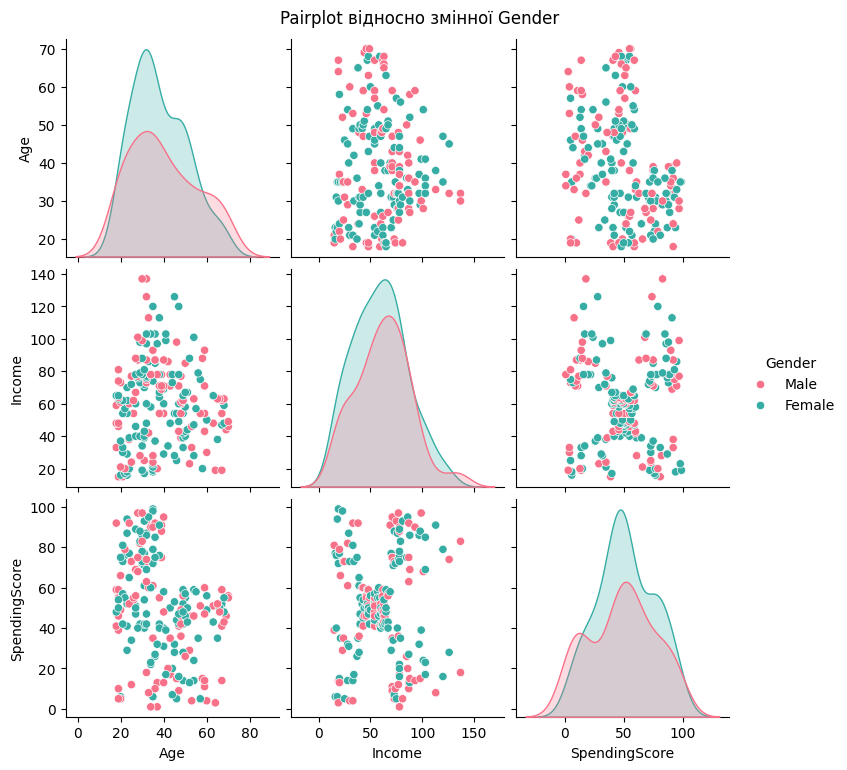

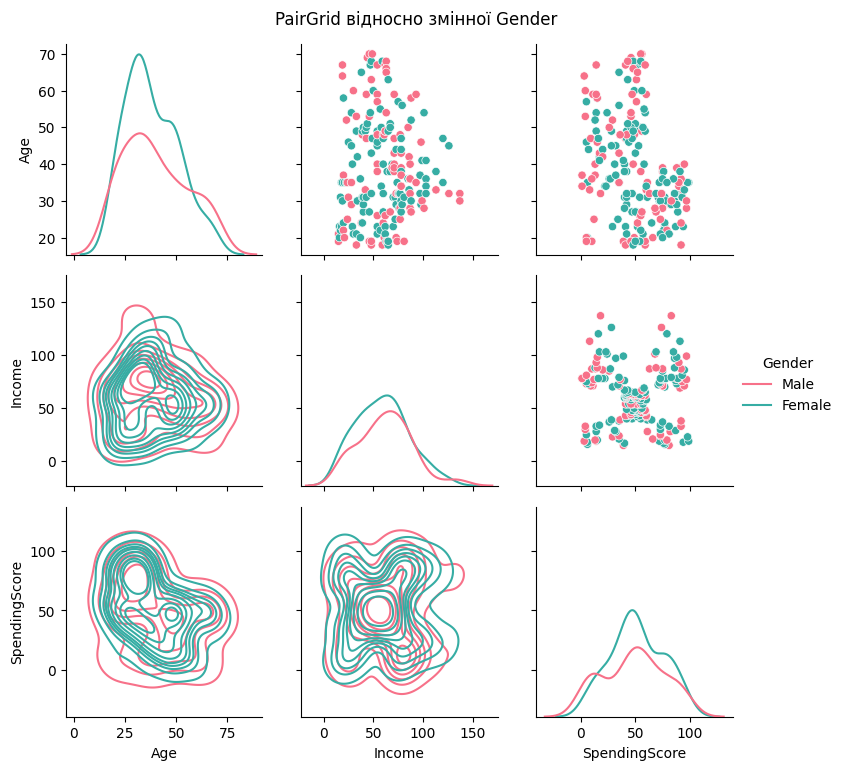

In [6]:
sns.pairplot(customer_set, hue='Gender', palette='husl')
plt.suptitle('Pairplot відносно змінної Gender', y=1.02)
plt.show()

g = sns.PairGrid(customer_set, hue='Gender', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend(title='Gender')
plt.suptitle('PairGrid відносно змінної Gender', y=1.02)
plt.show()

**Висновки з 1-4 завдання (детальні)**

Завдання 1: Я перевірив дані, вивів основну інформацію і побачив, що набір даних чистий, без пропущених значень.
Завдання 2: Після аналізу атрибутів вибірки було виявлено, що вона містить змінну CustomerID, яка не впливає на аналіз даних. Тому я видалив цю змінну.
Завдання 3: Я побудовав гістограми розподілу для змінних Age, Income та SpendingScore. Це дозволило отримати візуальне уявлення про розподіл цих змінних у вибірці.
Завдання 4: Проаналізував зв'язки між змінними відносно статі, щоб зрозуміти, чи є які-небудь відмінності між групами.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення по статям:
Gender
Female    112
Male       88
Name: count, dtype: int64


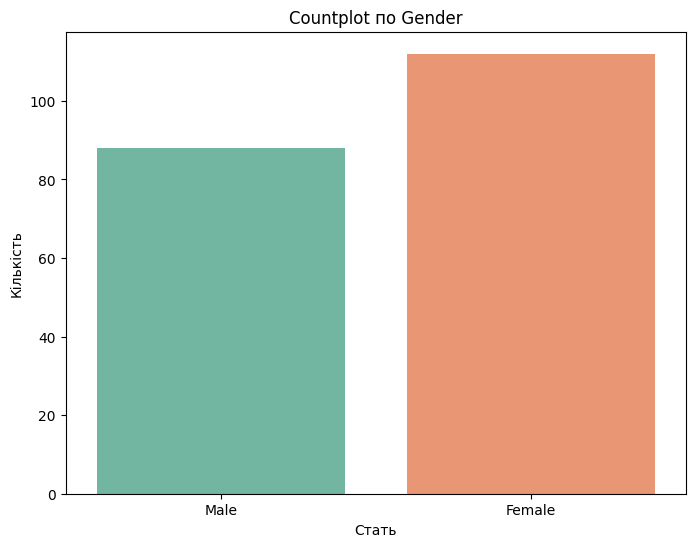

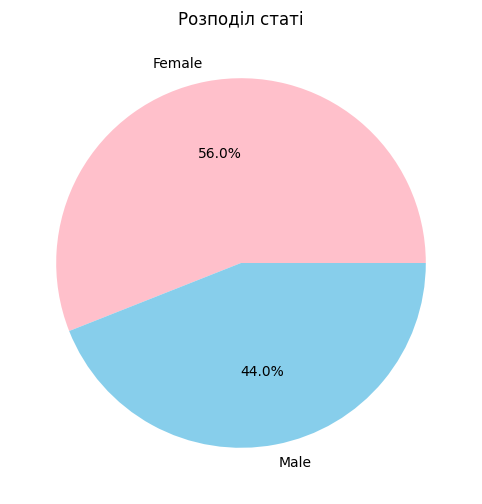

In [7]:
gender_counts = customer_set['Gender'].value_counts()
print("Співвідношення по статям:")
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=customer_set, x='Gender', palette='Set2')
plt.title('Countplot по Gender')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title('Розподіл статі')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

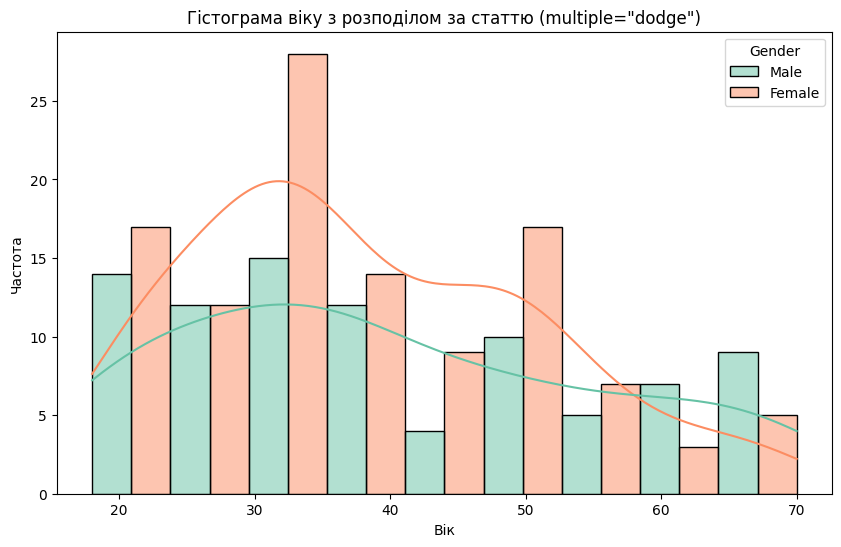

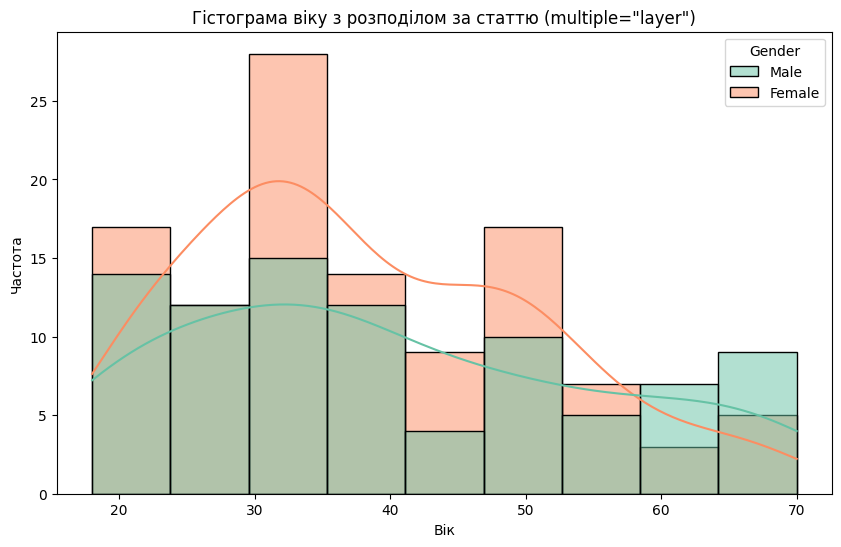

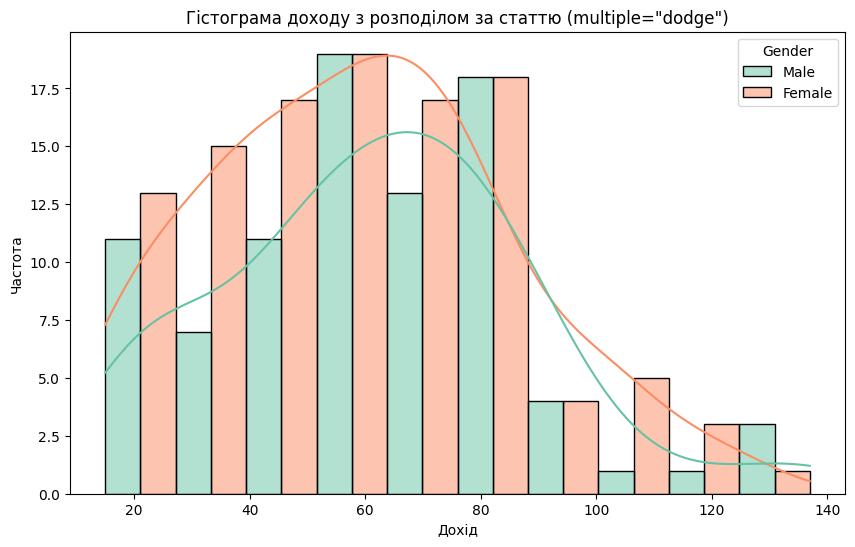

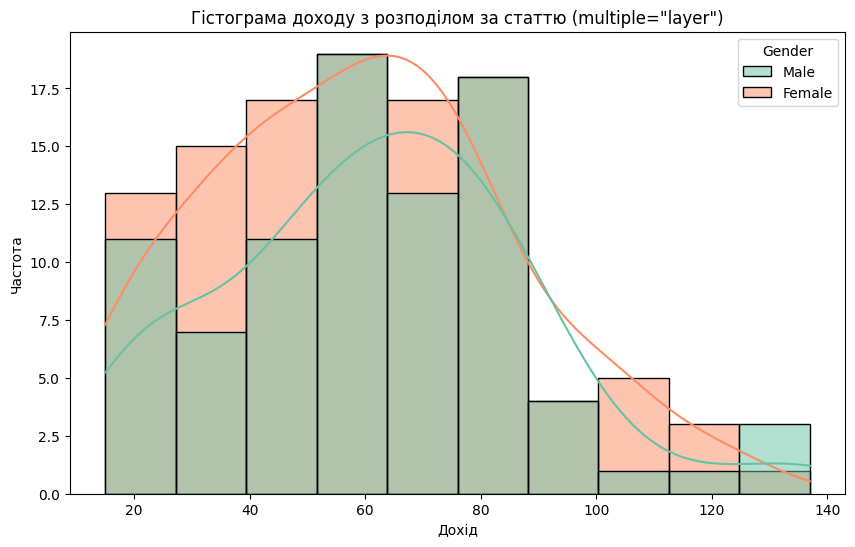

In [8]:
# Гістограма для змінної Age відносно змінної Gender з параметром 'dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', palette='Set2', kde=True)
plt.title('Гістограма віку з розподілом за статтю (multiple="dodge")')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

# Гістограма для змінної Age відносно змінної Gender з параметром 'layer'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', palette='Set2', kde=True)
plt.title('Гістограма віку з розподілом за статтю (multiple="layer")')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

# Гістограма для змінної Income відносно змінної Gender з параметром 'dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', palette='Set2', kde=True)
plt.title('Гістограма доходу з розподілом за статтю (multiple="dodge")')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

# Гістограма для змінної Income відносно змінної Gender з параметром 'layer'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', palette='Set2', kde=True)
plt.title('Гістограма доходу з розподілом за статтю (multiple="layer")')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



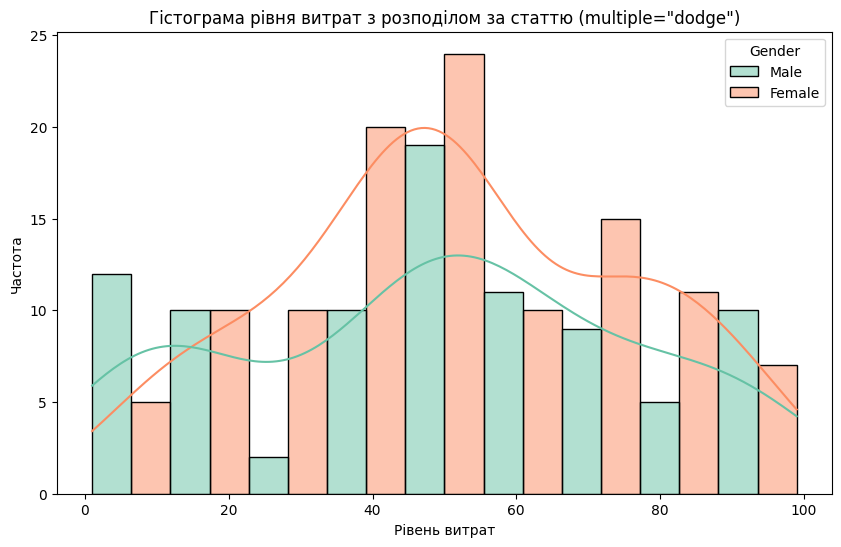

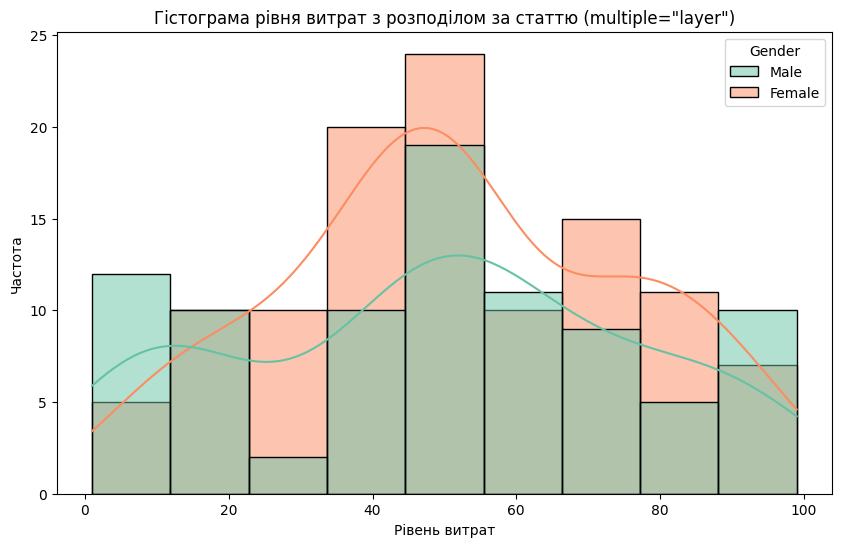

In [9]:
# Гістограма для змінної SpendingScore відносно змінної Gender з параметром dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', palette='Set2', kde=True)
plt.title('Гістограма рівня витрат з розподілом за статтю (multiple="dodge")')
plt.xlabel('Рівень витрат')
plt.ylabel('Частота')
plt.show()

# Гістограма для змінної SpendingScore відносно змінної Gender з параметром 'layer'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', palette='Set2', kde=True)
plt.title('Гістограма рівня витрат з розподілом за статтю (multiple="layer")')
plt.xlabel('Рівень витрат')
plt.ylabel('Частота')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

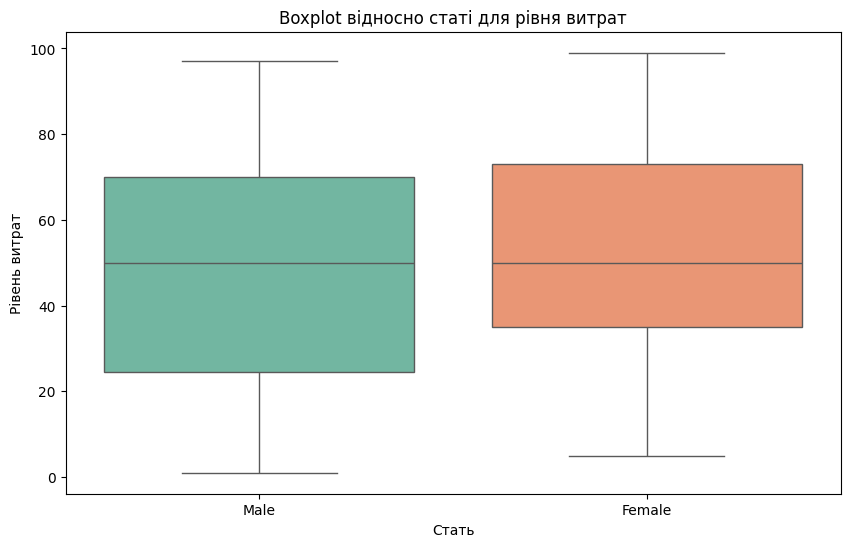

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_set, x='Gender', y='SpendingScore', palette='Set2')
plt.title('Boxplot відносно статі для рівня витрат')
plt.xlabel('Стать')
plt.ylabel('Рівень витрат')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?

Провівши аналіз змінної Gender, можна побачити, що в наборі даних співвідношення чоловіків до жінок складає 44% до 56% відповідно.

2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 

Після аналізу гістограм та boxplot, можна побачити, що є різниця у розподілі витрат між чоловіками та жінками. Можна виділити групи по віку та доходу, витрати жінок зазвичай більші.

3. Чи є різниця між витратами у чоловіків та жінок?

Можна побачити, що медіана витрат у чоловіків і жінок приблизно на одному рівні, проте середнє і максимум у жінок більше.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що це категоріальна змінна без впливу на сутність класифікації;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

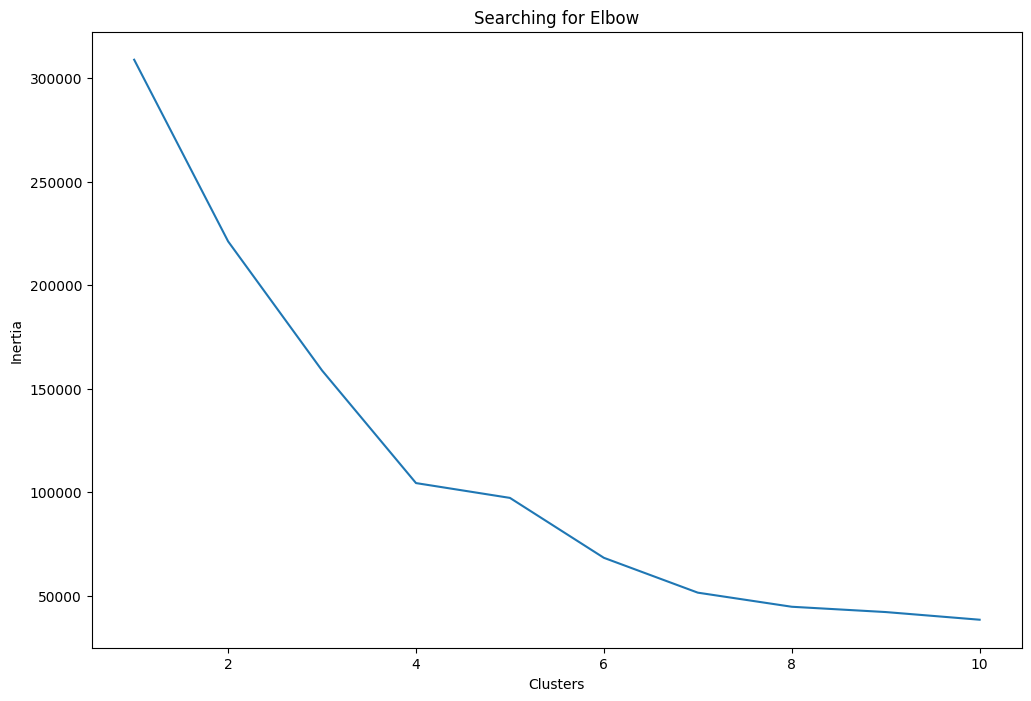

In [11]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

min_clusters = 1
max_clusters = 10

for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)

На мою думку, оптимальною кількістю кластерів може бути 4 або 5 (згідно методу Elbow). Можна оцінити структуру кожного кластера і його відстань до інших кластерів для визначення оптимального числа кластерів.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

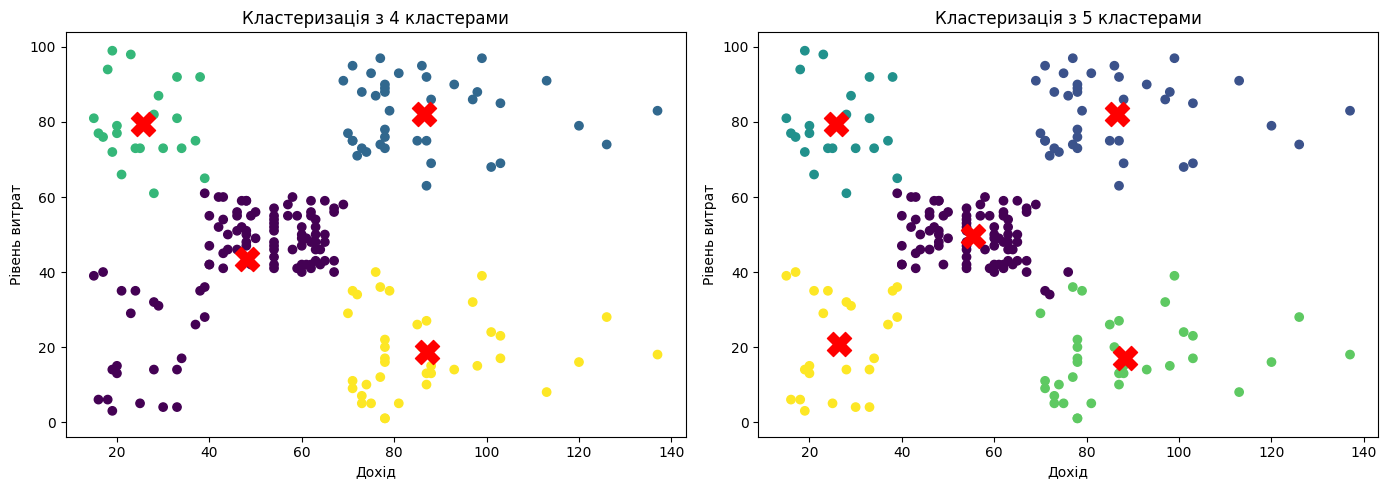

In [12]:
#1

num_clusters_1 = 4  

kmeans_1 = KMeans(n_clusters=num_clusters_1, init='k-means++', random_state=42)
kmeans_1.fit(X[['Income', 'SpendingScore']])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['Income'], X['SpendingScore'], c=kmeans_1.labels_, cmap='viridis')
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'Кластеризація з {num_clusters_1} кластерами')
plt.xlabel('Дохід')
plt.ylabel('Рівень витрат')

#2

num_clusters_2 = 5 

kmeans_2 = KMeans(n_clusters=num_clusters_2, init='k-means++', random_state=42)
kmeans_2.fit(X[['Income', 'SpendingScore']])

plt.subplot(1, 2, 2)
plt.scatter(X['Income'], X['SpendingScore'], c=kmeans_2.labels_, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'Кластеризація з {num_clusters_2} кластерами')
plt.xlabel('Дохід')
plt.ylabel('Рівень витрат')

plt.tight_layout()
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [13]:
#1 

fig1 = px.scatter_3d(x=X['Income'], y=X['SpendingScore'], z=kmeans_1.labels_, color=kmeans_1.labels_,
                     labels={'x': 'Дохід', 'y': 'Рівень витрат', 'z': 'Кластери'})
fig1.show()

# 2

fig2 = px.scatter_3d(x=X['Income'], y=X['SpendingScore'], z=kmeans_2.labels_, color=kmeans_2.labels_,
                     labels={'x': 'Дохід', 'y': 'Рівень витрат', 'z': 'Кластери'})
fig2.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.

Кластеризація з 5 кластерами показує більш виражені та більш згруповані кластери, ніж кластеризація з 4 кластерами. Це свідчить про більшу роздільну здатність моделі з 5 кластерами, яка змогла знайти більш деталізовані групи у даних.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


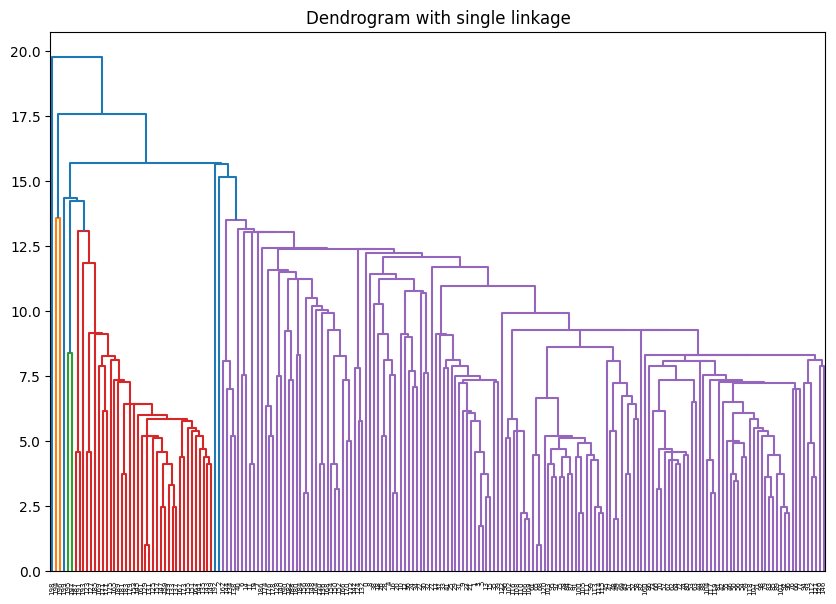

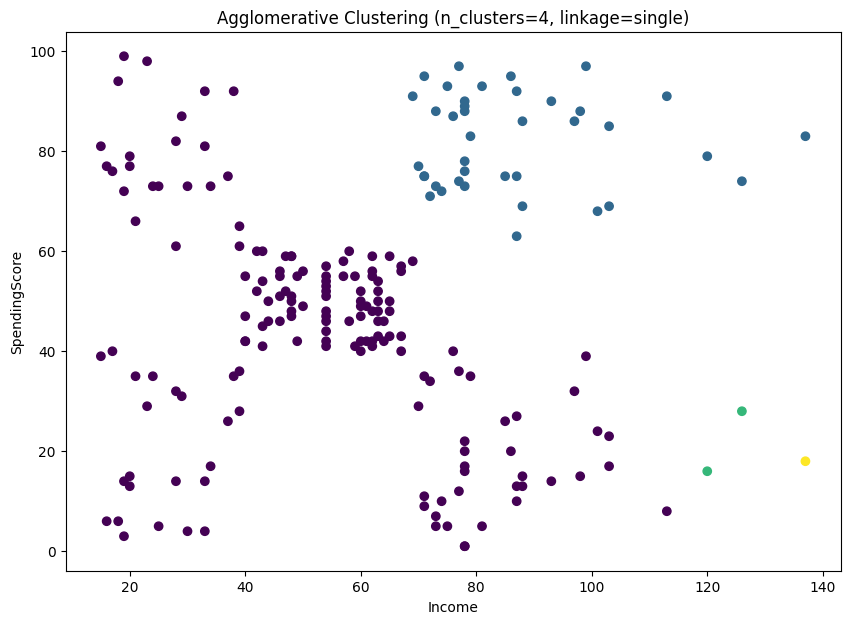

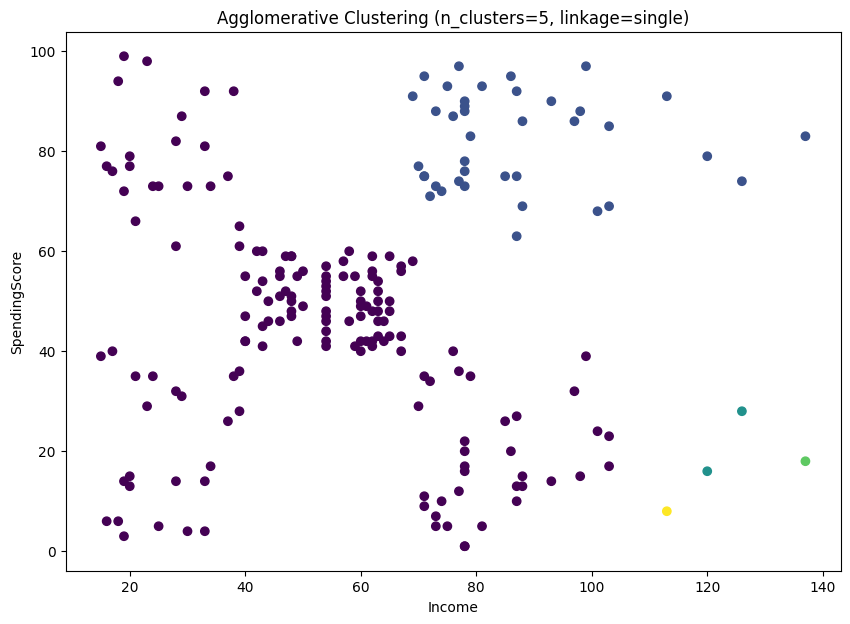

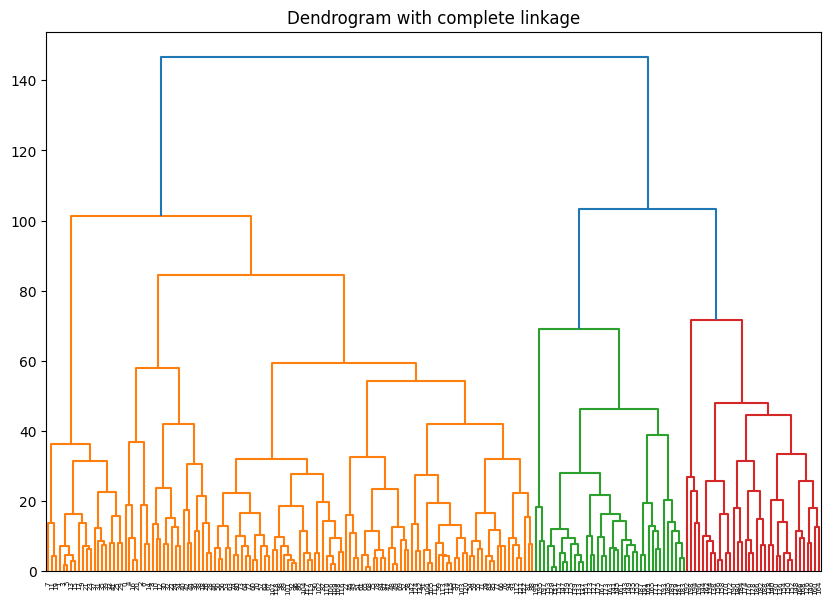

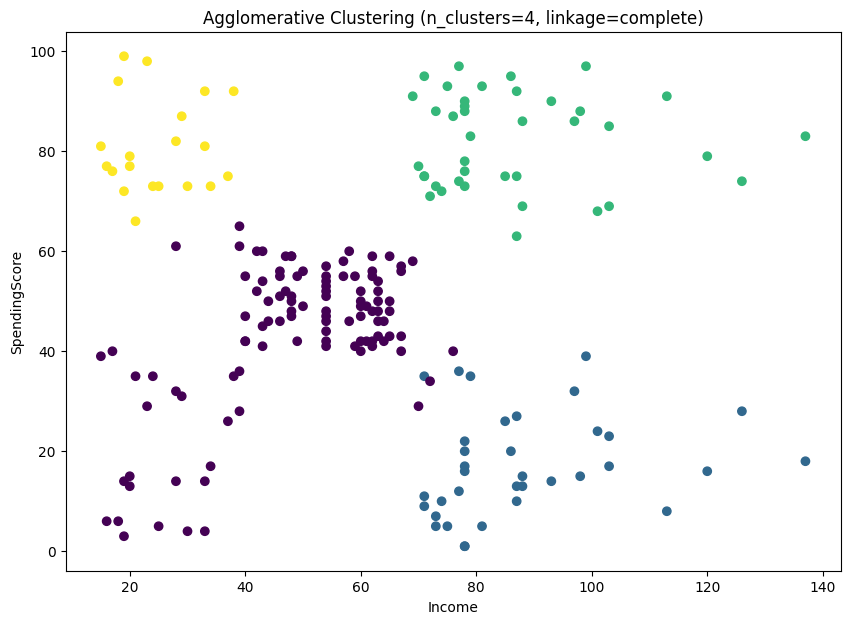

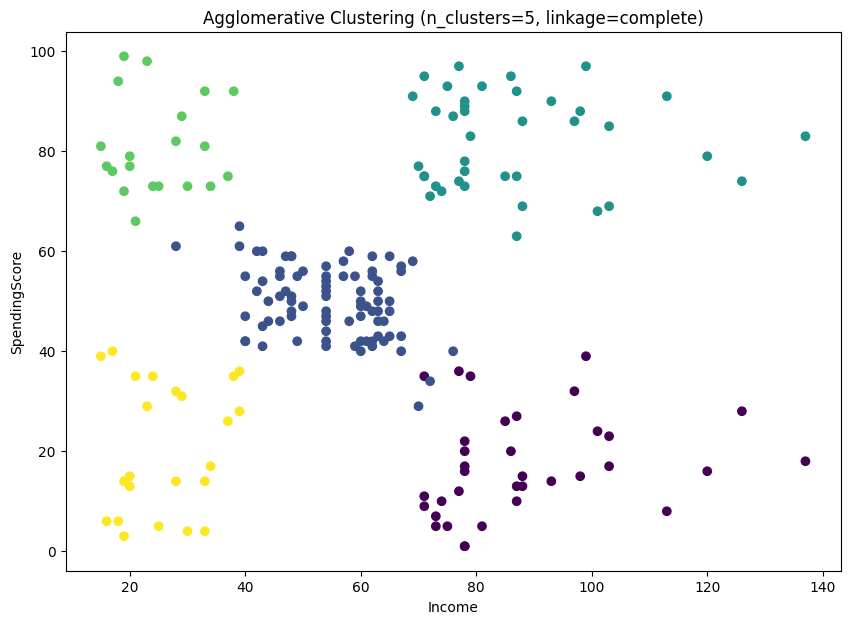

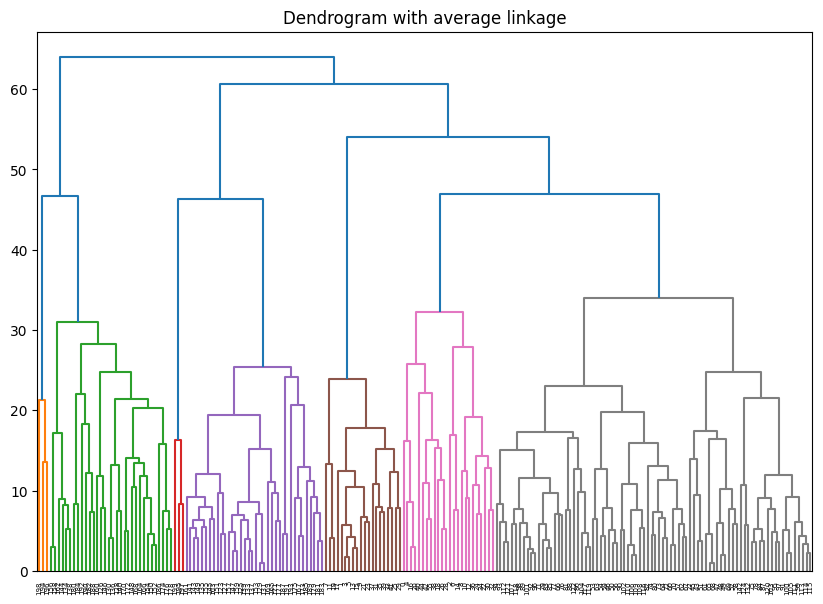

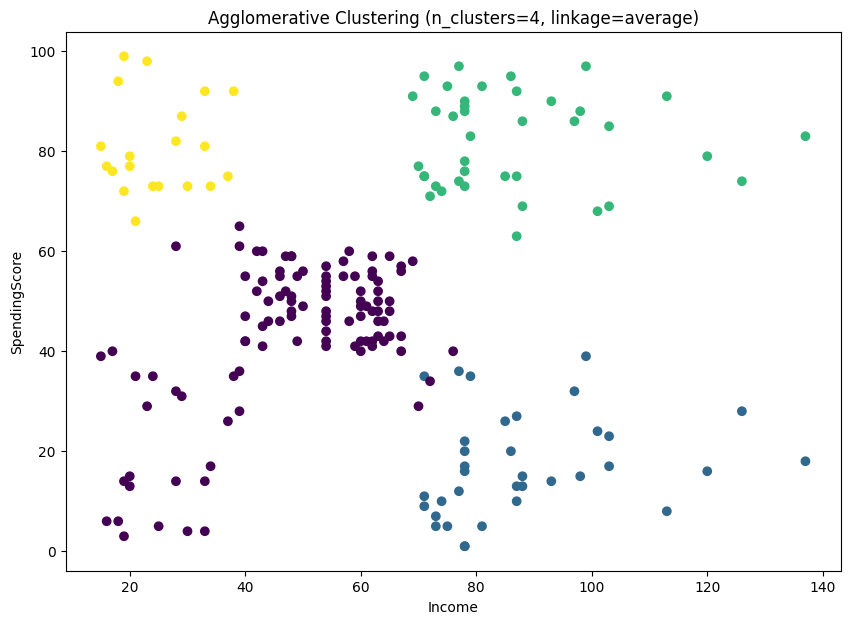

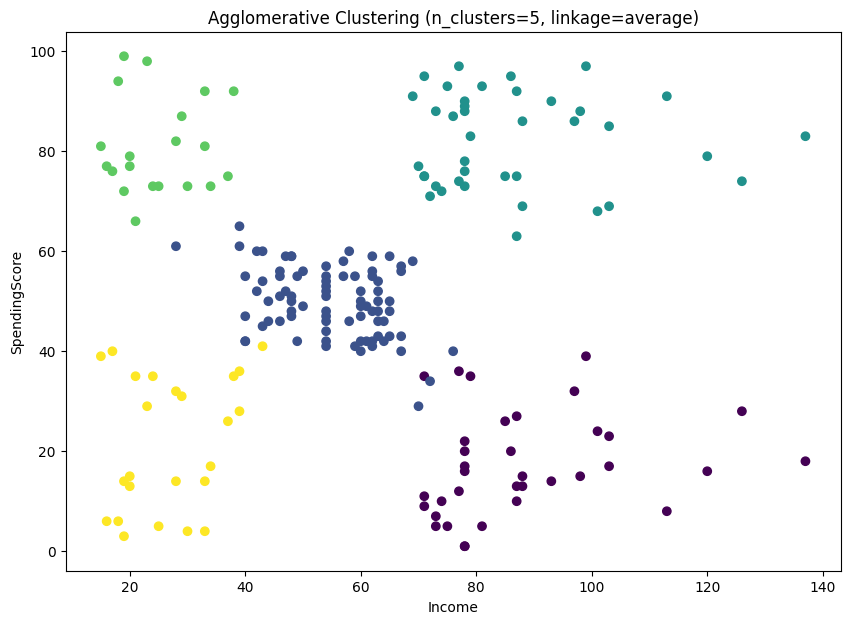

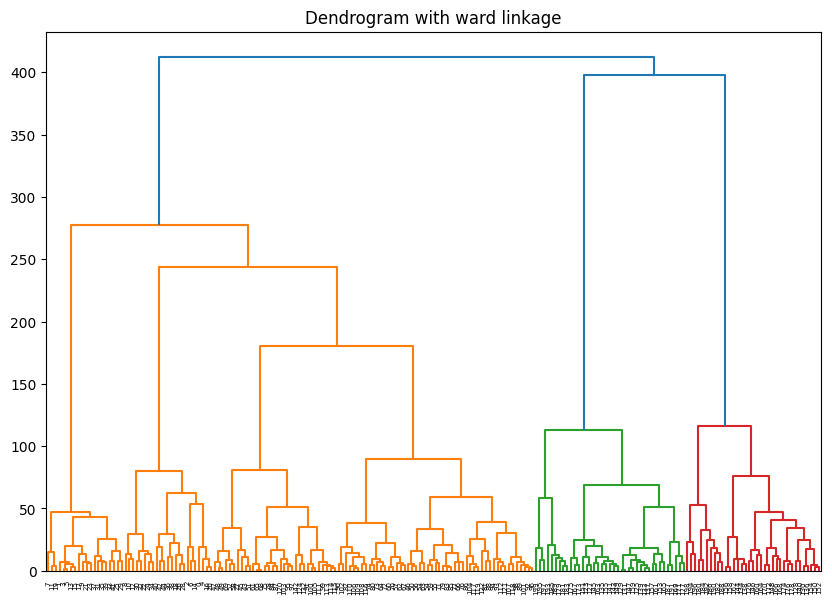

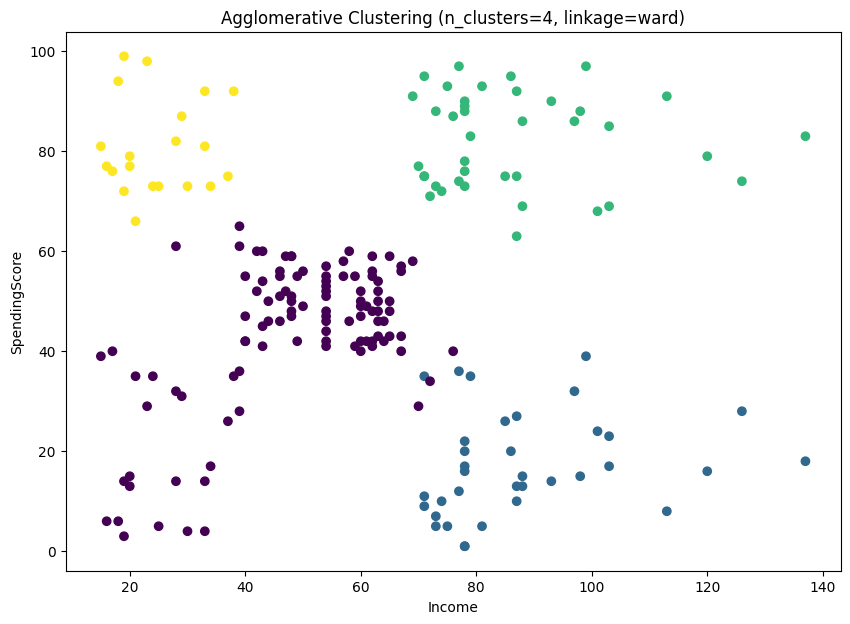

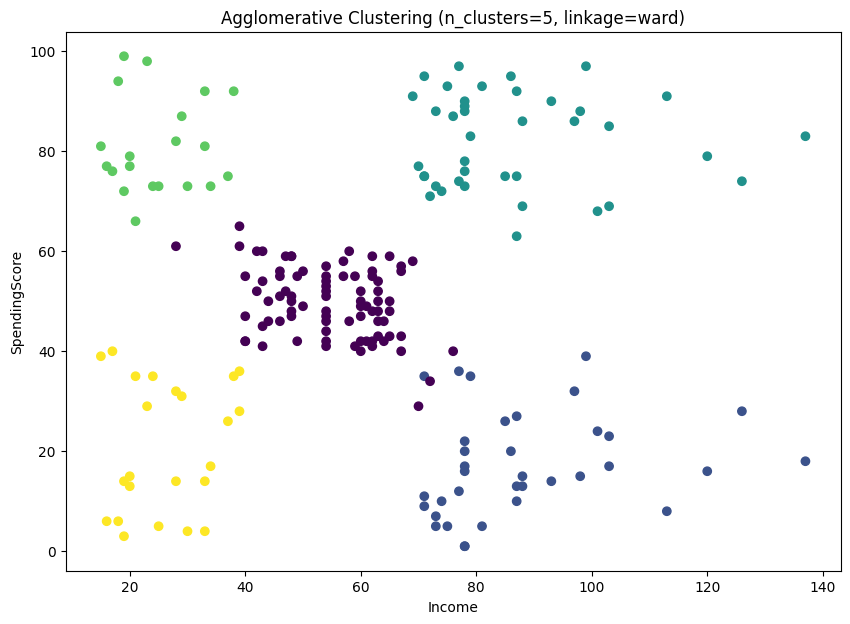

In [16]:
n_clusters = [4, 5]
linkage_methods = ['single', 'complete', 'average', 'ward'] 

for method in linkage_methods:

    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram with {method} linkage")
    dend = hierarchy.dendrogram(hierarchy.linkage(X, method=method))
    plt.show()
    
    for n_cluster in n_clusters:
        cluster = AgglomerativeClustering(n_clusters=n_cluster, linkage=method)
        cluster.fit_predict(X)

        plt.figure(figsize=(10, 7))
        plt.scatter(X['Income'], X['SpendingScore'], c=cluster.labels_, cmap='viridis')
        plt.title(f'Agglomerative Clustering (n_clusters={n_cluster}, linkage={method})')
        plt.xlabel('Income')
        plt.ylabel('SpendingScore')
        plt.show()

**Висновки з завдання 12 (детальні)**

Я провів агломеративну ієрархічну кластеризацію з різними методами зв'язку та кількістю кластерів, оцінив вплив цих параметрів на кластери. Дендрограми надали інформацію про структуру кластеризації для кожного методу зв'язку, як результат, різні методи зв'язку та кількість кластерів вплинули на форму та розмір кластерів, відображаючи різноманітні структури даних

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

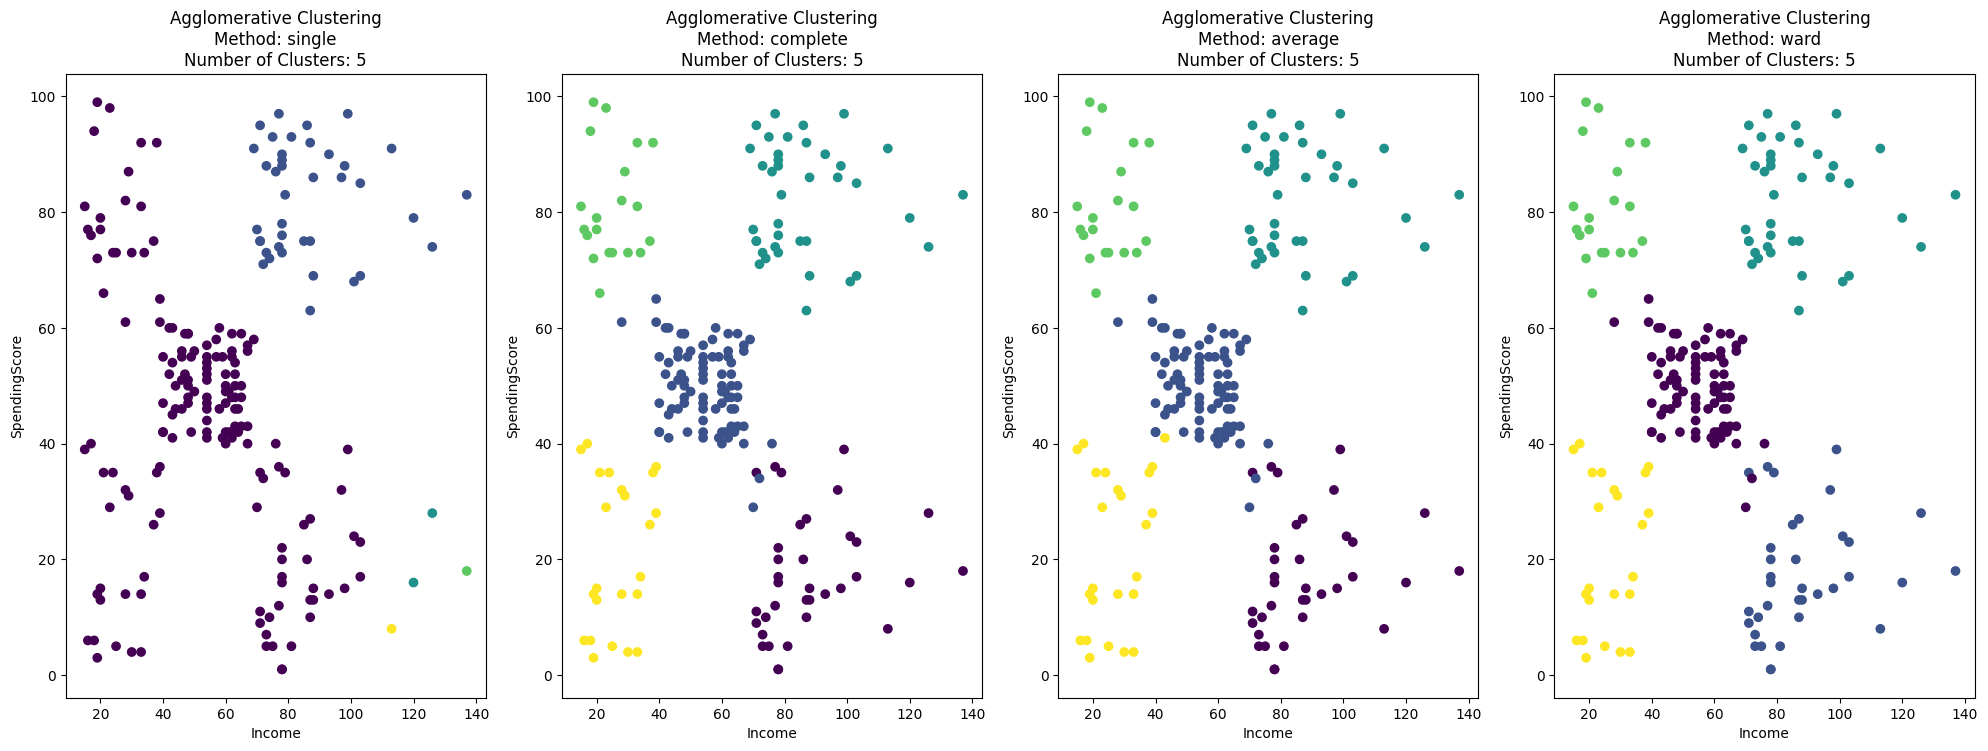

In [17]:
plt.figure(figsize=(20, 14))

n_clusters = 5

for i, method in enumerate(linkage_methods):
    
    plt.subplot(2, 4, i + 1)
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = cluster.fit_predict(X)
    plt.scatter(X['Income'], X['SpendingScore'], c=cluster_labels, cmap='viridis')
    plt.title(f'Agglomerative Clustering\nMethod: {method}\nNumber of Clusters: {n_clusters}')
    plt.xlabel('Income')
    plt.ylabel('SpendingScore')

plt.tight_layout()
plt.show()


**Висновки з завдання 13 (детальні)**

Результати кластеризації показали як різні методи зв'язку впливають на кінцеву структуру кластерів. Такі методи як complete, average і ward сформували збалансовані кластери, а single був не такий ефективний і сформував кластери з великим відхиленням у формі.